# Discretization

The aim of the discretization algorithm is to find the minimum
number of intervals without incurring in information loss

**Important assumptions**
* Impute Missing Values: Handle any missing data to ensure a complete dataset.
* Sort Data: Organize data in ascending order to facilitate binning.
* Define Bin Criteria: Decide on the number of bins or bin edges based on the chosen discretization method.
* Data Distribution: Consider the nature of the data distribution when choosing a discretization method.
* Homogeneity of Bins: Ensure bins are meaningful and similar within each bin.

**Link for references**
[Discretization](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/ACUY5lP7FxH0whnRjxQgfOQ/Section-12-Discretisation-Basic?dl=0&e=3&preview=07-Wrapping-up.pdf&rlkey=7257ih8lct4v0nkroy7if74i1)

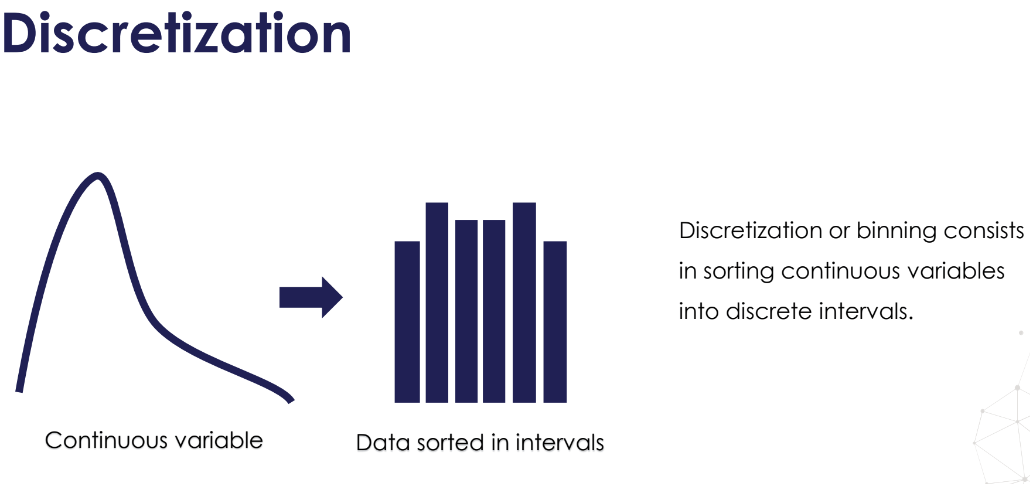

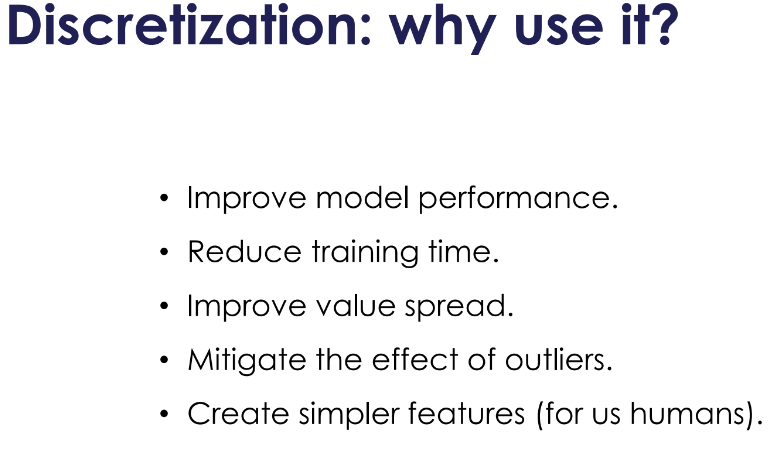

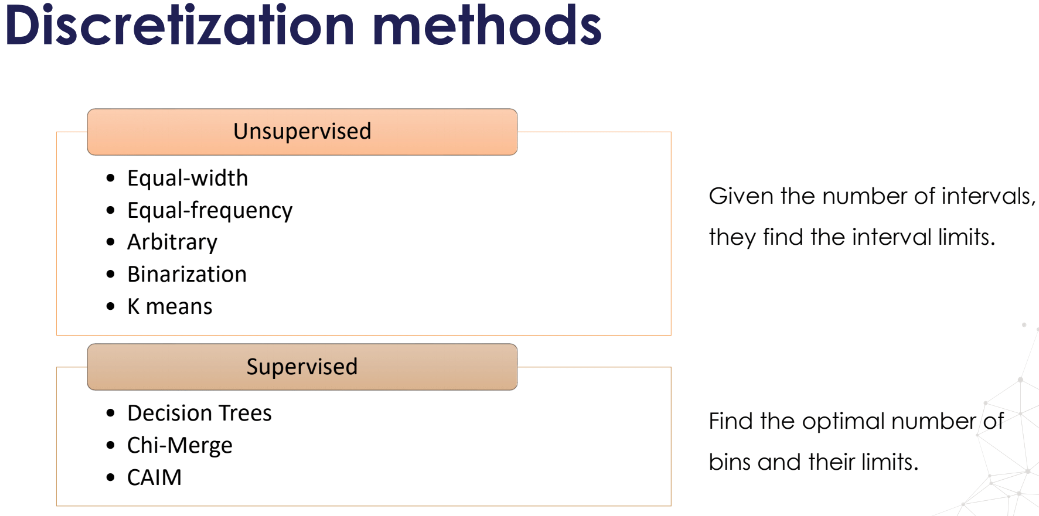

# Equal width discretization
Equal width discretization divides the scope of possible values into N bins of the same width. The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable:

width = (max value - min value) / N

where N is the number of bins or intervals.

**There is no rule of thumb to define N; that is something to determine experimentally.**



## Template

* DATA IMPUTATION IS GENERALLY RECOMMENDED


In [ ]:
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

## Equal width discretisation with Sklearn

In [ ]:
# Step 1: Import the KBinsDiscretizer from scikit-learn
# This imports the discretizer tool used to divide continuous features into bins.
from sklearn.preprocessing import KBinsDiscretizer

# Step 2: Initialize the KBinsDiscretizer
# Create an instance of KBinsDiscretizer with specific settings for binning.
disc = KBinsDiscretizer(
    n_bins=8,             # Step 3: Set the number of bins to 8
    # Defines that 'age' and 'fare' will be divided into 8 bins.
    encode='ordinal',     # Step 4: Encode the bins as ordinal integers
    # Bins will be represented as integers starting from 0 for each bin.
    strategy='uniform',   # Step 5: Use a uniform binning strategy
    # The bins will be equally spaced between the minimum and maximum values.
    subsample=None        # Step 6: Do not use subsampling for large datasets
    # No subsampling is done, so the entire dataset is used for binning.
)

# Step 7: Set the output format to pandas
# Configures the output to be a pandas DataFrame for easier data handling.
disc.set_output(transform="pandas")

# Step 8: Fit the KBinsDiscretizer on selected columns of X_train
# The discretizer learns bin edges for the 'age' and 'fare' columns based on the training data.
disc.fit(X_train[['age', 'fare']])

# Step 9: View the bin edges for the 'age' and 'fare' columns
# Shows the actual bin boundaries (edges) determined during fitting.
disc.bin_edges_

# Step 10: Transform the training data using the learned bin edges
# The 'age' and 'fare' columns are discretized into bins in the training dataset.
train_t = disc.transform(X_train[['age', 'fare']])

# Step 11: Transform the test data using the same bin edges
# The 'age' and 'fare' columns in the test dataset are binned using the same bin edges.
test_t = disc.transform(X_test[['age', 'fare']])

# Step 12: Display the first few rows of the transformed training data
# Shows the discretized 'age' and 'fare' columns from the training set.
train_t.head()

### Visualize the results

In [ ]:
# Step 1: Calculate the relative frequency of bins in training data
# Computes the proportion of observations in each bin for 'age' in the training set and sorts them by bin.
t1 = train_t['age'].value_counts(normalize=True).sort_index()

# Step 2: Calculate the relative frequency of bins in test data
# Computes the proportion of observations in each bin for 'age' in the test set and sorts them by bin.
t2 = test_t['age'].value_counts(normalize=True).sort_index()

# Step 3: Combine the two frequency tables
# Combines the training and test set frequency tables side-by-side for comparison.
tmp = pd.concat([t1, t2], axis=1)

# Step 4: Rename the columns for clarity
# Assigns column names to indicate 'train' and 'test' data in the combined table.
tmp.columns = ['train', 'test']

# Step 5: Plot the bar chart
# Creates a bar plot to visualize the number of observations per bin in the train and test data.
tmp.plot.bar()

# Step 6: Rotate x-axis labels
# Rotates x-axis labels to 0 degrees for better readability.
plt.xticks(rotation=0)

# Step 7: Add y-axis label
# Labels the y-axis to indicate it shows the number of observations per bin.
plt.ylabel('Number of observations per bin')

## Equal width discretisation with Feature Engine

In [ ]:
# Step 1: Import EqualWidthDiscretiser from feature_engine
# Import the discretizer class to perform equal-width binning on selected variables.
from feature_engine.discretisation import EqualWidthDiscretiser

# Step 2: Initialize the discretizer
# Set up the EqualWidthDiscretiser with 8 bins and specify the variables ('age', 'fare') to transform.
disc = EqualWidthDiscretiser(bins=8, variables=['age', 'fare'])

# Step 3: Fit the discretizer to the training data
# Learn the binning intervals for 'age' and 'fare' based on the training data.
disc.fit(X_train)

# Step 4: Inspect the binning intervals
# The binner_dict_ attribute shows the limits of the intervals for each variable after fitting.
disc.binner_dict_

# Step 5: Transform the training data
# Apply the equal-width binning transformation to the 'age' and 'fare' columns in the training data.
train_t = disc.transform(X_train)

# Step 6: Transform the test data
# Apply the same binning transformation learned from the training data to the test data.
test_t = disc.transform(X_test)

# Step 7: View the transformed training data
# Display the first few rows of the transformed training data.
train_t.head()

# Equal frequency discretization

## Equal frequency discretization with Sklearn

Equal frequency discretization divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. **This is particularly useful for skewed variables, as it spreads the observations over the different bins equally.** We find the interval boundaries by determining the quantiles.

Equal frequency discretization using quantiles consists of dividing the continuous variable into N quantiles, where N to be defined by the user.

Equal frequency binning is straightforward to implement, and by spreading the values of the observations more evenly, it may help boost the algorithm's performance. This arbitrary binning may also disrupt the relationship with the target.

In [ ]:
# Step 1: Import KBinsDiscretizer from sklearn.preprocessing
# Import the KBinsDiscretizer class for binning continuous variables into discrete bins.
from sklearn.preprocessing import KBinsDiscretizer

# Step 2: Initialize the discretizer with quantile strategy
# Set up KBinsDiscretizer to create 10 bins, using quantile strategy, and encode as ordinal.
disc = KBinsDiscretizer(
    n_bins=10,  # Create 10 bins for each variable
    encode='ordinal',  # Output the bin indices as ordinal numbers
    strategy='quantile'  # Use quantile strategy to ensure bins have equal number of samples
)

# Step 3: Set output format
# Ensure the output after transformation is in pandas DataFrame format.
disc.set_output(transform="pandas")

# Step 4: Fit the discretizer to training data
# Learn the binning intervals for 'age' and 'fare' based on the training data distribution.
disc.fit(X_train[['age', 'fare']])

# Step 5: Inspect the bin edges
# View the edges of the bins created for the 'age' and 'fare' columns after fitting.
disc.bin_edges_

# Step 6: Transform the training data
# Apply the binning transformation to the 'age' and 'fare' columns in the training data.
train_t = disc.transform(X_train[['age', 'fare']])

# Step 7: Transform the test data
# Apply the same binning transformation to the 'age' and 'fare' columns in the test data.
test_t = disc.transform(X_test[['age', 'fare']])

# Step 8: View the transformed training data
# Display the first few rows of the transformed training data after discretization.
train_t.head()

## Equal frequency discretization with Feature-Engine


In [ ]:
# Step 1: Import EqualFrequencyDiscretiser from feature_engine.discretisation
# Import the EqualFrequencyDiscretiser class for binning continuous variables into discrete bins with equal frequency.
from feature_engine.discretisation import EqualFrequencyDiscretiser

# Step 2: Initialize the discretizer with desired parameters
# Set up the EqualFrequencyDiscretiser to create 10 quantile-based bins for 'age' and 'fare', returning interval boundaries.
disc = EqualFrequencyDiscretiser(
    q=10,  # Create 10 bins with equal number of samples in each bin
    variables=['age', 'fare'],  # Specify the variables to transform
    return_boundaries=True  # Return the boundaries of the bins
)

# Step 3: Fit the discretizer to the training data
# Learn the binning intervals for 'age' and 'fare' based on the distribution of the training data.
disc.fit(X_train)

# Step 4: Inspect the binning intervals
# View the bin edges for 'age' and 'fare', which may vary in width depending on the data distribution.
disc.binner_dict_

# Step 5: Transform the training data
# Apply the equal-frequency binning transformation to the 'age' and 'fare' columns in the training data.
train_t = disc.transform(X_train)

# Step 6: Transform the test data
# Apply the same binning transformation to the 'age' and 'fare' columns in the test data.
test_t = disc.transform(X_test)

# Step 7: View the transformed training data
# Display the first few rows of the transformed training data after discretization.
train_t.head()

# Arbitrary discretization

Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. Typical examples include the discretization of variables like age and income.

Income, for example, is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per age, it is usually divided into certain groups according to the business need; for example, divisions into 0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.


## Arbitrary discretization with Sklearn

In [ ]:
from feature_engine.discretisation import ArbitraryDiscretiser

# Step 1: Initialize the ArbitraryDiscretiser with predefined bin edges for each variable.
# Defines specific bin boundaries for 'age' and 'fare' according to the user's choice.
disc = ArbitraryDiscretiser(
    binning_dict = {
        "age": [0, 18, 25, 40, 80],
        "fare": [0, 20, 50, 100, 600]
    },
)

# Step 2: Fit the transformer to the training data and transform it.
# Applies the predefined binning to the 'age' and 'fare' columns in the training data.
train_t = disc.fit_transform(X_train)

# Step 3: Transform the test data using the same binning.
# Applies the same binning scheme to the 'age' and 'fare' columns in the test data.
test_t = disc.transform(X_test)

# Step 4: Display the top rows of the transformed training data.
# Shows the first few rows of the transformed training data with the new binning applied.
train_t.head()

# Discretization plus Encoding

What shall we do with the variable after discretisation? should we use the buckets as a numerical variable? or should we use the intervals as categorical variable?

The answer is, you can do either.

If you are building decision tree based algorithms and the output of the discretisation are integers (each integer referring to a bin), then you can use those directly, as decision trees will pick up non-linear relationships between the discretised variable and the target.

If you are building linear models instead, the bins may not necessarily hold a linear relationship with the target. In this case, it may help improve model performance to treat the bins as categories and to one hot encoding, or target guided encodings like mean encoding, weight of evidence, or target guided ordinal encoding.

We can easily do so by combining feature-engine's discretisers and encoders.

## Imputation

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder
from feature_engine.imputation import RandomSampleImputer

# Random imputation
imputer = RandomSampleImputer(random_state=0, variables=["age", "embarked", "fare"])

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

##Discretization

In [ ]:
# Step 1: Set up the EqualFrequencyDiscretiser with 10 quantiles for 'age' and 'fare'
# This initializes the discretizer to divide the variables into 10 bins each, and returns the bins as objects.
discretizer = EqualFrequencyDiscretiser(
    q=10, variables=['age', 'fare'], return_object=True
)

# Step 2: Fit the discretizer to the training data and transform it
# This applies the equal frequency binning to the 'age' and 'fare' columns in the training set.
X_train = discretizer.fit_transform(X_train)

# Step 3: Transform the test data using the same discretizer
# This applies the same equal frequency binning to the 'age' and 'fare' columns in the test set.
X_test = discretizer.transform(X_test)

# Step 4: Check the data types of the transformed variables in the training data
# This shows the data types of the columns after transformation to ensure they are now categorical objects.
X_train.dtypes

# Step 5: Display the top rows of the transformed training data
# This provides a view of the first few rows of the training data after discretization.
X_train.head()

### Visualize if the bins have any linear relationship

In [ ]:
# Step 1: Group the target variable 'y_test' by the 'age' bins in the test data
# This computes the mean of the target variable 'survived' for each bin of the 'age' variable.
y_test.groupby(X_test['age']).mean().plot()

# Step 2: Set the y-axis label for the plot
# This labels the y-axis to indicate that the values represent the mean of the 'survived' target variable.
plt.ylabel('mean of survived')

## Encoding

In [ ]:
# Step 1: Initialize the OrdinalEncoder with the 'ordered' encoding method
# This sets up the encoder to encode categorical variables with ordinal encoding based on the target variable.
encoder = OrdinalEncoder(encoding_method='ordered')

# Step 2: Fit the encoder on the training data and transform it
# This trains the encoder on the training data and transforms the training data into ordinal values.
X_train = encoder.fit_transform(X_train, y_train)

# Step 3: Transform the test data using the fitted encoder
# This applies the same ordinal encoding to the test data based on the training data's encoding.
X_test = encoder.transform(X_test)

# Step 4: Display the mapping of bins to positions
# This shows the dictionary of the bin to position mapping used in the ordinal encoding.
encoder.encoder_dict_

### Visualize results

In [ ]:
# Step 1: Group the test data's target variable 'y_test' by the discretized 'age' bins in the test data
# This calculates the mean of the 'survived' target variable for each 'age' bin.
y_test.groupby(X_test['age']).mean().plot()

# Step 2: Set the y-axis label for the plot
# This labels the y-axis to show that it represents the mean of the 'survived' target variable.
plt.ylabel('mean of survived')

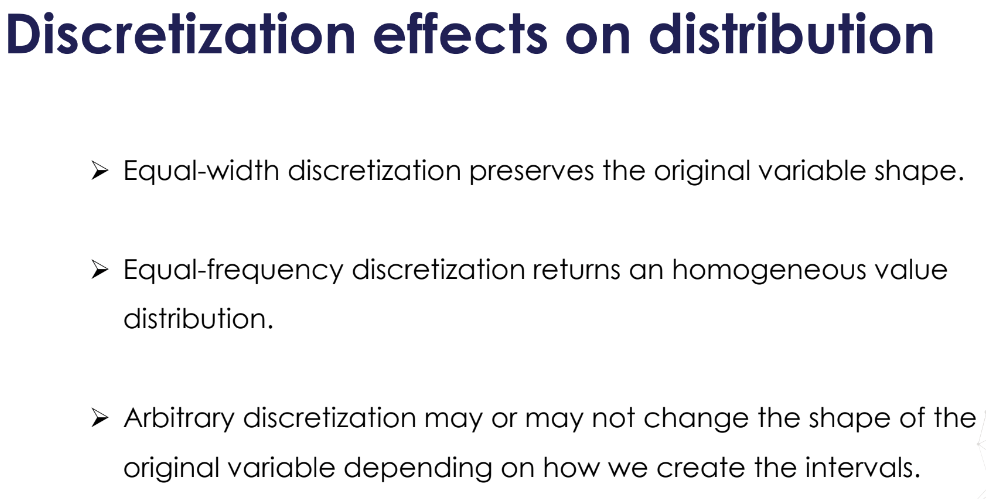

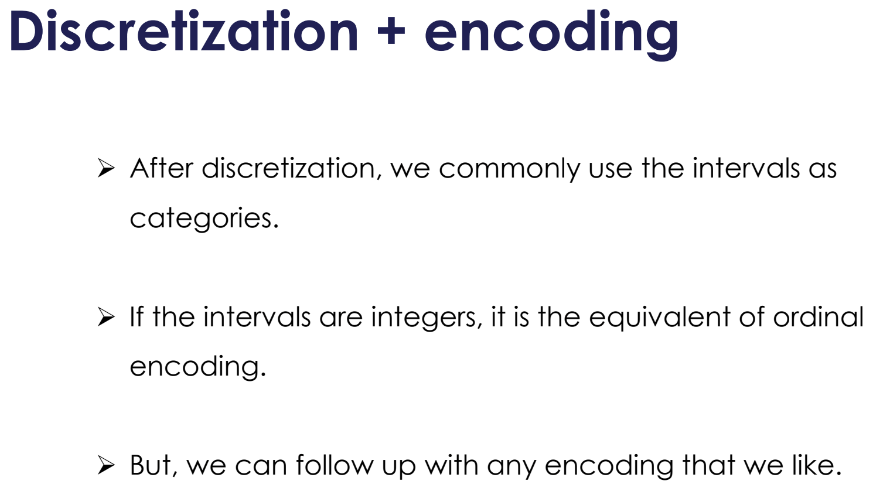